In [1]:
import matplotlib.pyplot as plt
from dataset import Eurosat,Cifar

testset = Cifar(mode='test')

/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified


tensor([[[0.9922, 0.9843, 0.9922,  ..., 0.4510, 0.4431, 0.4510],
         [1.0000, 1.0000, 1.0000,  ..., 0.4471, 0.4000, 0.4588],
         [0.9961, 0.9882, 0.9922,  ..., 0.4314, 0.4235, 0.4745],
         ...,
         [0.1843, 0.1961, 0.1725,  ..., 0.7294, 0.9373, 0.9529],
         [0.1569, 0.1686, 0.1333,  ..., 0.8863, 0.9843, 0.9804],
         [0.1490, 0.1451, 0.1333,  ..., 0.9647, 0.9647, 0.9529]],

        [[0.8588, 0.8863, 0.9059,  ..., 0.3294, 0.3176, 0.3255],
         [0.8863, 0.9098, 0.9255,  ..., 0.3176, 0.2902, 0.3529],
         [0.8863, 0.9059, 0.9176,  ..., 0.3490, 0.3333, 0.3686],
         ...,
         [0.1490, 0.1608, 0.1373,  ..., 0.6863, 0.8745, 0.8941],
         [0.1216, 0.1373, 0.1059,  ..., 0.8431, 0.9412, 0.9490],
         [0.1059, 0.1098, 0.1059,  ..., 0.9216, 0.9373, 0.9294]],

        [[0.7490, 0.8000, 0.8078,  ..., 0.2627, 0.2314, 0.2353],
         [0.7647, 0.8157, 0.8235,  ..., 0.2235, 0.2196, 0.2549],
         [0.7765, 0.8118, 0.8196,  ..., 0.2706, 0.2627, 0.

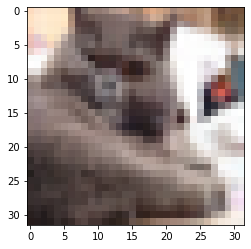

In [6]:
i =8
sample = testset[i]
image = sample['image']
label = sample['label']

print(image)

plt.imshow(image.permute(1,2,0))
#plt.imshow(label.reshape(1,2,0))
plt.show()

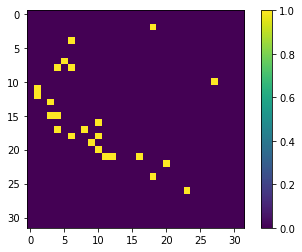

In [7]:
import torch
plt.imshow(label)
 
plt.colorbar()
plt.show()

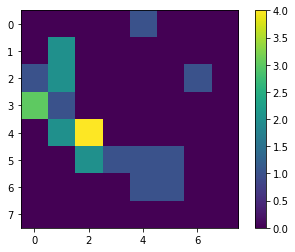

torch.Size([32, 32])
torch.Size([1, 1, 8, 8])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0625, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1250, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0625, 0.1250, 0.0000, 0.0000, 0.0000, 0.0000, 0.0625, 0.0000],
          [0.1875, 0.0625, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1250, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1250, 0.0625, 0.0625, 0.0625, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0625, 0.0625, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]]])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
torch.Size([1, 1, 32, 32])


/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/torch/nn/functional.py:3982: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")


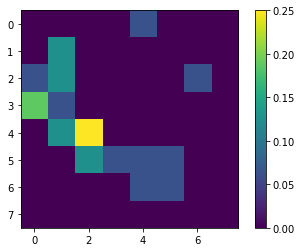

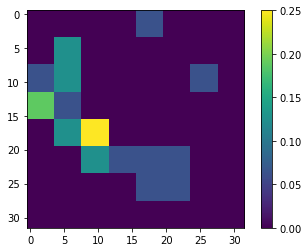

In [12]:
import torch.nn as nn
avg_pool = nn.AvgPool2d((4, 4), stride=4)
sum_pool = nn.AvgPool2d((4, 4), stride=4, divisor_override = 1 )

sum_pooled = sum_pool(label.unsqueeze(0).unsqueeze(0))
plt.imshow(sum_pooled.squeeze(0).squeeze(0))
plt.colorbar()
plt.show()

print(label.shape)
pooled = avg_pool(label.unsqueeze(0).unsqueeze(0))
print(pooled.shape)
plt.imshow(pooled.squeeze(0).squeeze(0))
plt.colorbar()
huh = torch.nn.functional.upsample_nearest(pooled,scale_factor=4)
print(pooled)
print(huh)
print(huh.shape)
plt.show()
plt.imshow(huh.squeeze(0).squeeze(0))
plt.colorbar()
plt.show()


In [10]:
print((torch.sqrt(sum(label-huh)**2)/len(label)).mean())



tensor(0.0013)
